In [46]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn import datasets
from sklearn.decomposition import PCA, NMF
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()

In [3]:
iris.keys()

dict_keys(['DESCR', 'target', 'feature_names', 'data', 'target_names'])

In [4]:
model = KMeans(n_clusters=3)

In [5]:
model.fit(iris.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [6]:
labels = model.predict(iris.data)

In [7]:
xs = iris.data[:,0]
ys = iris.data[:,2]

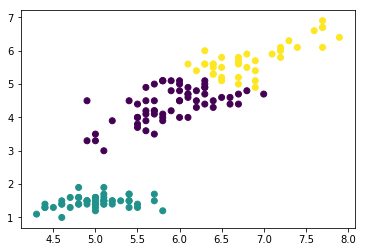

In [8]:
plt.scatter(xs, ys, c=labels)

In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [11]:
df = pd.DataFrame({'labels': labels, 'species': iris.target})

In [12]:
ct = pd.crosstab(df['labels'], df['species'])

In [13]:
print(ct)

species   0   1   2
labels             
0         0  48  14
1        50   0   0
2         0   2  36


In [14]:
clusters = range(1,10)
inertias = []

In [15]:
for cluster in clusters:
    model = KMeans(n_clusters=cluster)
    model.fit(iris.data)
    inertias.append(model.inertia_)

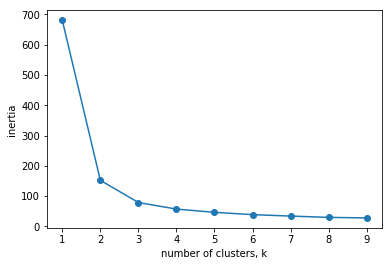

In [16]:
plt.plot(clusters, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(clusters)
plt.show()

### t-SNE maps samples to 2D (or 3D) space from a higher dimensional space. Map approximately preserves nearness of sample. Great for inspecting dataset

In [17]:
iris.keys()

dict_keys(['DESCR', 'target', 'feature_names', 'data', 'target_names'])

In [18]:
model = TSNE(learning_rate=100)
transformed = model.fit_transform(iris.data)

In [19]:
xs = transformed[:,0]
ys = transformed[:,1]

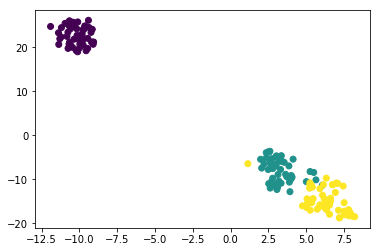

In [20]:
plt.scatter(xs, ys, c=iris.target)

## Decorrelating your data and dimension reduction

In [21]:
documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']

In [22]:
# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer()

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)

[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
['cats', 'chase', 'dogs', 'meow', 'say', 'woof']


In [23]:
df = pd.read_csv('https://assets.datacamp.com/production/course_2072/datasets/fish.csv' , header=None)

In [24]:
df.head()

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [25]:
df = df.drop(columns=[0])

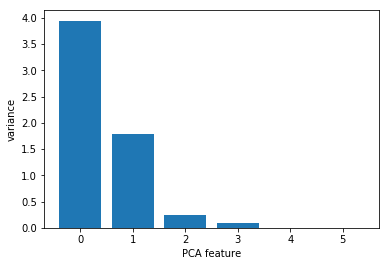

In [26]:
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(df)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features,pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

### Shows that only 2 PCA features have significant variance, i.e. the intrinsic dimension of the fish measurements. This means that only we have done dimension redection and found out that only 2 features are important

In [29]:
df = pd.read_csv('Data/Wikipedia articles/wikipedia-vectors.csv', index_col=0)

In [31]:
articles = csr_matrix(df.transpose())
titles = list(df.columns)

The reason for taking this transpose is that without it, there would be 13,000 columns (corresponding to the 13,000 words in the file), which is a lot of columns for a CSV to have.

In [35]:
model = NMF(n_components=6)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

In [36]:
df = pd.DataFrame(nmf_features, index=titles)

# Print the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway'])

# Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington'])

0    0.003846
1    0.000000
2    0.000000
3    0.575647
4    0.000000
5    0.000000
Name: Anne Hathaway, dtype: float64
0    0.000000
1    0.005601
2    0.000000
3    0.422333
4    0.000000
5    0.000000
Name: Denzel Washington, dtype: float64


This means that both articles are reconstructed using mainly the 3rd NMF component

In [44]:
with open('Data/Wikipedia articles/wikipedia-vocabulary-utf8.txt') as infile:
    words = infile.readlines()

In [45]:
components_df = pd.DataFrame(model.components_, columns=words)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[3]

# Print result of nlargest
print(component.nlargest())

(6, 13125)
film\n       0.627946
award\n      0.253159
starred\n    0.245311
role\n       0.211474
actress\n    0.186418
Name: 3, dtype: float64


## What articles are closest to Cristiano Ronaldo?

In [48]:
norm_features = normalize(nmf_features)

df = pd.DataFrame(norm_features, index=titles)

# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['Cristiano Ronaldo']

# Compute the dot products: similarities
similarities = df.dot(article)

# Display those with the largest cosine similarity
print(similarities.nlargest())

Cristiano Ronaldo                1.000000
Franck Ribéry                    0.999972
Radamel Falcao                   0.999942
Zlatan Ibrahimović               0.999942
France national football team    0.999923
dtype: float64
